In [54]:
#importing pythn libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns; sns.set()

In [2]:
#Loading training data
train_df =  pd.read_csv("C:\\Users\\saumy\\OneDrive\\Desktop\\train_data.csv")
train_df.shape

(614, 13)

In [3]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
#Data distribution of numerical features

train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [57]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [87]:
#defining target variable, categorical features, numerical features

label = 'Loan_Status'

categorical_features = list(train_df.select_dtypes(include=['object']).columns)
categorical_features.remove('Loan_ID')
numerical_features = list(train_df.select_dtypes(exclude=['object']).columns)
numerical_features.remove(label)
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [93]:
def crosstab_categorical_target_variables(train_df,label,categorical_features):
    for each_categorical_val in categorical_features:
        cross_tab_table = pd.crosstab(train_df[each_categorical_val], train_df[label])
        print(cross_tab_table,'\n\n')
        
    

In [94]:
crosstab_categorical_target_variables(train_df,label,categorical_features)

Loan_Status    0    1
Gender               
Female        32   54
Male         116  278 


Loan_Status   0    1
Married             
No           64  105
Yes          84  227 


Loan_Status   0    1
Dependents          
0            87  187
1            28   52
2            20   65
3+           13   28 


Loan_Status     0    1
Education             
Graduate      112  271
Not Graduate   36   61 


Loan_Status      0    1
Self_Employed          
No             125  289
Yes             23   43 


Loan_Status     0    1
Property_Area         
Rural          54   85
Semiurban      42  149
Urban          52   98 




In [95]:
#Correlation between numerical features
train_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


In [46]:
print("Credit History has the highest correlation with Loan Status")

Credit History has the highest correlation with Loan Status


In [47]:
#counting null values
train_df.isnull().sum().sum()

0

In [113]:
#removing rows with null values 
train_df = train_df.dropna(how='any',axis=0) 
train_df.shape

(480, 13)

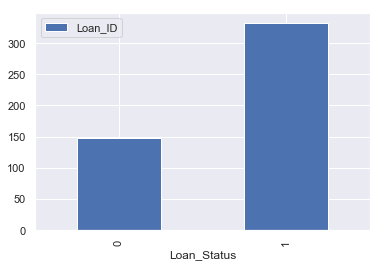

In [118]:
label_count=train_df.groupby(label, as_index=False).count()
a=label_count[['Loan_Status' , 'Loan_ID']]
a.plot( x = 'Loan_Status' , kind ='bar')

In [15]:
# Encoding the label/output variable

label_encode = LabelEncoder()
train_df.Loan_Status = label_encode.fit_transform(train_df.Loan_Status)
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,1


In [17]:
#Splitting data into training and validation data

train,val = train_test_split(train_df, test_size = 0.2)
print("Size of training data",train.shape)
print("Size of validation data",val.shape)

Size of training data (384, 13)
Size of validation data (96, 13)


In [18]:
# storing the independent variables for training data
# columns not required for modelremoved- Loan_ID

train_x = train.drop(columns = ['Loan_ID','Loan_Status'])

#saving the target variable for training data 
train_y = train['Loan_Status']


In [19]:
# storing the independent variables for validation data
# columns not required for modelremoved- Loan_ID

val_x = val.drop(columns = ['Loan_ID','Loan_Status'])

#saving the target variable for validation data 
val_y = val['Loan_Status']

In [20]:
# Encoding categorical independent features for training and validation data

train_x  = pd.get_dummies(train_x)
val_x  = pd.get_dummies(val_x)

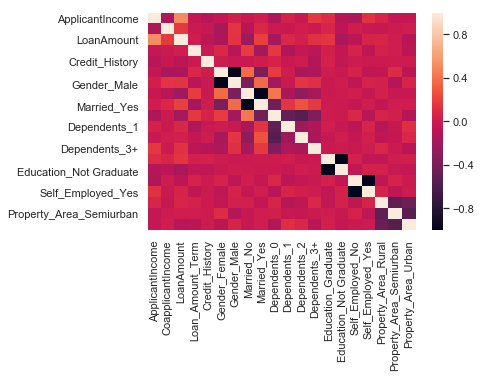

In [97]:
#Correlation between all features

correlation_features=train_x.corr()
ax2 = sns.heatmap(correlation_features)


In [21]:
#Checking shape of training sets after encoding categorical values to ensure they have the same number of columns

print("Size of training data with independent variables",train_x.shape)
print("Size of validation data with independent variables",val_x.shape)

Size of training data with independent variables (384, 20)
Size of validation data with independent variables (96, 20)


In [22]:
#Defining Model

model = LogisticRegression()

In [23]:
#Fitting model on training data

model.fit(train_x,train_y)

c:\users\saumy\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
#Making predictions using val data

predictions = model.predict(val_x)
print('Loan prediction on val data',predictions)

Loan prediction on val data [1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0]


In [25]:
#Confusion Matrix for predictions

confusionMatrix = pd.crosstab(val_y, predictions)
confusionMatrix
#confusion_matrix(val_y, predictions)

col_0,0,1
Loan_Status,,
0,16,15
1,1,64


In [26]:
#Calculating accuracy and score of the model

accuracy = (confusionMatrix[0][0]+confusionMatrix[1][1])/(confusionMatrix[0][0]+confusionMatrix[1][1] + confusionMatrix[0][1]+confusionMatrix[1][0])
#accuracy = accuracy_score(val_y,predictions)
print('\n Classification accuracy for val data:',accuracy,'\n\n')

#recall = (confusionMatrix[0][0])/(confusionMatrix[0][0]+confusionMatrix[0][1])
#print('\n Classification recall for val data:',recall,'\n\n')
#precision = (confusionMatrix[0][0])/(confusionMatrix[0][0]+confusionMatrix[1][0])
#print('\n Classification precision for val data:',precision,'\n\n')
#f_measure = (2*recall*precision)/recall+precision
#print('\n Classification F1 metric for val data:',f_measure,'\n\n')

scores=classification_report(val_y,predictions)
print(scores)




 Classification accuracy for val data: 0.8333333333333334 


              precision    recall  f1-score   support

           0       0.94      0.52      0.67        31
           1       0.81      0.98      0.89        65

   micro avg       0.83      0.83      0.83        96
   macro avg       0.88      0.75      0.78        96
weighted avg       0.85      0.83      0.82        96



In [27]:
# loading test data 
test_df =  pd.read_csv("C:\\Users\\saumy\\OneDrive\\Desktop\\test_data.csv")
test_df.shape

(367, 12)

In [28]:
#Handling null values
test_df.isnull().sum().sum()

84

In [29]:
test_df = test_df.dropna(how='any',axis=0) 
test_df.shape
test_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [31]:
# Encoding categorical independent features for test data

test_x = test_df.drop(columns = ['Loan_ID'])
test_x  = pd.get_dummies(test_x)
test_x.shape

(289, 20)

In [32]:
#Predicting Values using test set

test_predictions = model.predict(test_x)
test_predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [33]:
# Generating output in desired format

In [34]:
len(test_predictions)

289

In [35]:
loan_id_array=test_df['Loan_ID'].values
len(loan_id_array)

289

In [36]:
output_df = pd.DataFrame({'Loan_ID':loan_id_array, 'Loan_Status':test_predictions})
output_df['Loan_Status'] = output_df['Loan_Status'].map({1:'Y', 0: 'N'})
output_df.to_csv("C:\\Users\\saumy\\OneDrive\\Desktop\\Loan Prediction Output.csv", index=False)
output_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001051,Y
4,LP001054,Y
5,LP001055,Y
6,LP001056,N
7,LP001067,Y
8,LP001078,Y
9,LP001096,Y


In [40]:
#Enter values and check if loan gets approved or not

data = {
        'Gender_Female': [1],
        'Gender_Male': [0],
        'Married_No': [1],
        'Married_Yes': [0],
        'Dependents_0': [1],
        'Dependents_1': [0],
        'Dependents_2': [0],
        'Dependents_3+': [0],
        'Education_Graduate': [1],
        'Education_Not_Graduate': [0],
        'Self_Employed_No': [1],
        'Self_Employed_Yes': [0],
        'ApplicantIncome': [65000],
        'CoapplicantIncome': [0],
        'LoanAmount': [11000],
        'Loan_Amount_Term': [360],
        'Credit_History': [0],
        'Property_Area_Rural': [0],
        'Property_Area_Semiurban': [0],
        'Property_Area_Urban': [1]
        }

predict_df = pd.DataFrame (data, columns = [
        'Gender_Female',
        'Gender_Male',
        'Married_No',
        'Married_Yes',
        'Dependents_0',
        'Dependents_1',
        'Dependents_2',
        'Dependents_3+',
        'Education_Graduate',
        'Education_Not_Graduate',
        'Self_Employed_No',
        'Self_Employed_No',
        'ApplicantIncome',
        'CoapplicantIncome',
        'LoanAmount',
        'Loan_Amount_Term',
        'Credit_History',
        'Property_Area_Rural',
        'Property_Area_Semiurban',
        'Property_Area_Urban'])
    

#predict_df.shape

test_prediction = model.predict(predict_df)

if(test_prediction==1):
    { print("Congratulations! Loan Approved.")}
else:
    { print("Sorry. Loan not approved.")}


Congratulations! Loan Approved.
